<h1><center>SALES ANALYSIS</center></h1>

The kernel is a simple example to analyze the sales of store in the year 2019. The notebook is divided into two stages:<br> 
[Data Cleaning](#sec_1)
<br>
[Data Exploration](#sec_2)
<br>
Data exploration answers to the following questions about the store:-
<br>
- What was the best month for sales? How much was earned that month? 
- What city sold the most product?
-  What time should we display advertisements to maximize likelihood of customer's buying product?
- What products are most often sold together?
- What product sold the most? 

In [172]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Our sales data is distrbuted into  12 motnhs of the year 2019. So our first step is to merge all these data into one single dataframe.

In [173]:
path = './Sales_Data'

In [174]:
files = [file for file in os.listdir(path)]

In [175]:
print(files)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [176]:
df = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(path+'/'+file)
    df = pd.concat([df,current_data])

In [177]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [178]:
df = df.reset_index(drop=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [179]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [180]:
df.shape

(186850, 6)

In [181]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


<a id='sec_1'></a><br><h1><center>DATA CLEANING</center></h1>

- Checking for NA values

In [182]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [183]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the NA values, its clear that these values can be dropped

In [184]:
df = df.dropna()
df = df.reset_index(drop=True)

In [185]:
df.shape

(186305, 6)

<br>

- There are few other rows in the data which needs to be removed as below. This error occured because of the merging operation.

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [187]:
idx = df[df['Order ID'] == 'Order ID'].index 

In [188]:
df.loc[idx,:]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185009,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186019,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [189]:
df.drop(idx,inplace=True)
df.reset_index(drop=True,inplace=True)

In [190]:
print(df.shape)
df.tail(2)

(185950, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
185949,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


<br>

- The 'Quantiy Ordered' and 'Price Each' should not have data types as 'object'. So need to convert their values into correct datatypes

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [192]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Order ID'] = pd.to_numeric(df['Order ID'])

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ MB


<br>

- Converting the datatype of 'Order Date' column from object to datetime

In [194]:
df['Order Date']

0         04/19/19 08:46
1         04/07/19 22:30
2         04/12/19 14:38
3         04/12/19 14:38
4         04/30/19 09:27
               ...      
185945    09/17/19 20:56
185946    09/01/19 16:00
185947    09/23/19 07:39
185948    09/19/19 17:30
185949    09/30/19 00:18
Name: Order Date, Length: 185950, dtype: object

In [195]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [196]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"


In [197]:
df.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [198]:
# df.head(2)

In [199]:
#Sorted the values as per Order Date.
df.sort_values('Order Date',inplace=True) 

In [200]:
df.reset_index(drop=True,inplace=True)

In [201]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001"
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016"
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001"
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001"
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301"
...,...,...,...,...,...,...
185945,304165,AAA Batteries (4-pack),1,2.99,2020-01-01 04:13:00,"825 Adams St, Portland, OR 97035"
185946,299125,USB-C Charging Cable,1,11.95,2020-01-01 04:21:00,"754 Hickory St, New York City, NY 10001"
185947,305840,Bose SoundSport Headphones,1,99.99,2020-01-01 04:54:00,"784 River St, San Francisco, CA 94016"
185948,300519,Bose SoundSport Headphones,1,99.99,2020-01-01 05:13:00,"657 Spruce St, New York City, NY 10001"


In [202]:
#There were few values of 2020 jan 1st. So gotta remove them.
df = df[df['Order Date'].dt.year == 2019]

In [203]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001"
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016"
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001"
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001"
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301"
...,...,...,...,...,...,...
185911,297481,AA Batteries (4-pack),1,3.84,2019-12-31 23:42:00,"82 Hill St, Dallas, TX 75001"
185912,298406,AAA Batteries (4-pack),2,2.99,2019-12-31 23:42:00,"30 Elm St, San Francisco, CA 94016"
185913,317048,AAA Batteries (4-pack),2,2.99,2019-12-31 23:45:00,"743 Adams St, San Francisco, CA 94016"
185914,309773,AAA Batteries (4-pack),1,2.99,2019-12-31 23:52:00,"60 Hickory St, Los Angeles, CA 90001"


Retrive city name from 'Purchase Address' Column

In [204]:
def get_city(address):
    return address.split(',')[1]

In [205]:
pd.options.mode.chained_assignment = None
df['city'] = df['Purchase Address'].apply(lambda x: get_city(x))

In [206]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",New York City
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",San Francisco


<a id='sec_2'></a><br><h1 align="center">DATA EXPLORATION</h1><br> 

### Question 1: What was the best month for sales? How much was earned that month? 

In [207]:
df['Total Sales'] = df['Quantity Ordered']*df['Price Each']

In [208]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city,Total Sales
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",New York City,11.99
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",San Francisco,11.95
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",New York City,150.00
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",Dallas,2.99
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",Atlanta,23.90


In [209]:
df1 = df.groupby(df['Order Date'].dt.month)['Quantity Ordered','Total Sales'].sum().sort_values('Total Sales',ascending=False)

In [210]:
df1

,Quantity Ordered,Total Sales
Order Date,,
12,28114,4.613443e+06
10,22703,3.736727e+06
4,20558,3.390670e+06
11,19798,3.199603e+06
5,18667,3.152607e+06
3,17005,2.807100e+06
7,16072,2.647776e+06
6,15253,2.577802e+06
8,13448,2.244468e+06


In [211]:
df1.reset_index(inplace=True)

In [212]:
df1

,Order Date,Quantity Ordered,Total Sales
0,12,28114,4.613443e+06
1,10,22703,3.736727e+06
2,4,20558,3.390670e+06
3,11,19798,3.199603e+06
4,5,18667,3.152607e+06
5,3,17005,2.807100e+06
6,7,16072,2.647776e+06
7,6,15253,2.577802e+06
8,8,13448,2.244468e+06
9,2,13449,2.202022e+06


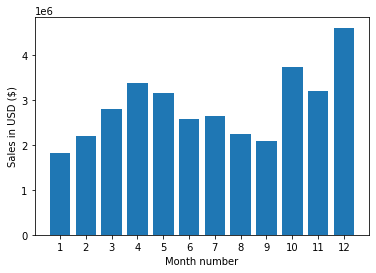

In [213]:
plt.bar(df1['Order Date'],df1['Total Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(df1['Order Date'])
plt.show()

Hence in <b>December</b> Sales is the highest.

<br>

### Question 2: What city sold the most product?

In [214]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city,Total Sales
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",New York City,11.99
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",San Francisco,11.95
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",New York City,150.00
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",Dallas,2.99
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",Atlanta,23.90


In [215]:
df2 = df.groupby('city')['Quantity Ordered','city'].sum().sort_values('Quantity Ordered')

In [216]:
df2

,Quantity Ordered
city,
Austin,11151
Portland,14051
Seattle,16552
Atlanta,16602
Dallas,16728
Boston,22524
New York City,27916
Los Angeles,33288
San Francisco,50226


In [217]:
df2.reset_index(inplace=True)
df2

,city,Quantity Ordered
0,Austin,11151
1,Portland,14051
2,Seattle,16552
3,Atlanta,16602
4,Dallas,16728
5,Boston,22524
6,New York City,27916
7,Los Angeles,33288
8,San Francisco,50226


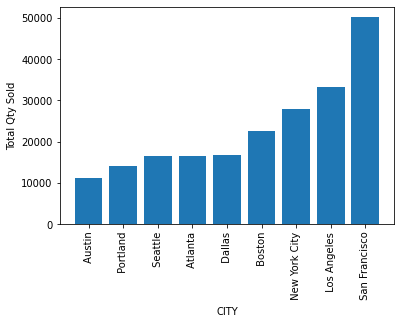

In [218]:
plt.bar(df2['city'],df2['Quantity Ordered'])
plt.ylabel('Total Qty Sold')
plt.xlabel('CITY')
plt.xticks(rotation='vertical')
plt.show()

Hence <b>San Franscisco</b> sold the most products

<br>

### Question 3: What products are most often sold together?

In [219]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city,Total Sales
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",New York City,11.99
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",San Francisco,11.95
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",New York City,150.00
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",Dallas,2.99
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",Atlanta,23.90
...,...,...,...,...,...,...,...,...
185911,297481,AA Batteries (4-pack),1,3.84,2019-12-31 23:42:00,"82 Hill St, Dallas, TX 75001",Dallas,3.84
185912,298406,AAA Batteries (4-pack),2,2.99,2019-12-31 23:42:00,"30 Elm St, San Francisco, CA 94016",San Francisco,5.98
185913,317048,AAA Batteries (4-pack),2,2.99,2019-12-31 23:45:00,"743 Adams St, San Francisco, CA 94016",San Francisco,5.98
185914,309773,AAA Batteries (4-pack),1,2.99,2019-12-31 23:52:00,"60 Hickory St, Los Angeles, CA 90001",Los Angeles,2.99


In [220]:
df4 = df[df['Order ID'].duplicated(keep = False)]

In [221]:
df4

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city,Total Sales
11,144804,iPhone,1,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",New York City,700.00
12,144804,Wired Headphones,1,11.99,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",New York City,11.99
65,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",Atlanta,11.95
66,148074,Google Phone,1,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",Atlanta,600.00
79,148450,iPhone,1,700.00,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",Dallas,700.00
...,...,...,...,...,...,...,...,...
185804,296804,AA Batteries (4-pack),1,3.84,2019-12-31 20:49:00,"114 10th St, Atlanta, GA 30301",Atlanta,3.84
185805,301832,20in Monitor,2,109.99,2019-12-31 20:51:00,"774 Washington St, San Francisco, CA 94016",San Francisco,219.98
185807,301832,AAA Batteries (4-pack),1,2.99,2019-12-31 20:51:00,"774 Washington St, San Francisco, CA 94016",San Francisco,2.99
185861,311036,Macbook Pro Laptop,1,1700.00,2019-12-31 22:04:00,"138 Lincoln St, Los Angeles, CA 90001",Los Angeles,1700.00


In [223]:
df4['Product list'] = df4.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [224]:
df4

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city,Total Sales,Product list
11,144804,iPhone,1,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",New York City,700.00,"iPhone,Wired Headphones"
12,144804,Wired Headphones,1,11.99,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",New York City,11.99,"iPhone,Wired Headphones"
65,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",Atlanta,11.95,"USB-C Charging Cable,Google Phone"
66,148074,Google Phone,1,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",Atlanta,600.00,"USB-C Charging Cable,Google Phone"
79,148450,iPhone,1,700.00,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",Dallas,700.00,"iPhone,Lightning Charging Cable"
...,...,...,...,...,...,...,...,...,...
185804,296804,AA Batteries (4-pack),1,3.84,2019-12-31 20:49:00,"114 10th St, Atlanta, GA 30301",Atlanta,3.84,"Lightning Charging Cable,AA Batteries (4-pack)"
185805,301832,20in Monitor,2,109.99,2019-12-31 20:51:00,"774 Washington St, San Francisco, CA 94016",San Francisco,219.98,"20in Monitor,AAA Batteries (4-pack)"
185807,301832,AAA Batteries (4-pack),1,2.99,2019-12-31 20:51:00,"774 Washington St, San Francisco, CA 94016",San Francisco,2.99,"20in Monitor,AAA Batteries (4-pack)"
185861,311036,Macbook Pro Laptop,1,1700.00,2019-12-31 22:04:00,"138 Lincoln St, Los Angeles, CA 90001",Los Angeles,1700.00,"Macbook Pro Laptop,AAA Batteries (4-pack)"


In [225]:
df4 = df4[['Order ID','Product list']].drop_duplicates()

In [226]:
df4

,Order ID,Product list
11,144804,"iPhone,Wired Headphones"
65,148074,"USB-C Charging Cable,Google Phone"
79,148450,"iPhone,Lightning Charging Cable"
92,144679,"USB-C Charging Cable,Google Phone"
94,147451,"Wired Headphones,Google Phone"
...,...,...
185729,303147,"Lightning Charging Cable,iPhone"
185789,318458,"iPhone,Apple Airpods Headphones"
185803,296804,"Lightning Charging Cable,AA Batteries (4-pack)"
185805,301832,"20in Monitor,AAA Batteries (4-pack)"


In [47]:
df4['Product list'].value_counts()

Lightning Charging Cable,iPhone                             458
USB-C Charging Cable,Google Phone                           453
iPhone,Lightning Charging Cable                             432
Google Phone,USB-C Charging Cable                           415
Wired Headphones,iPhone                                     191
                                                           ... 
Wired Headphones,Vareebadd Phone,USB-C Charging Cable         1
Flatscreen TV,20in Monitor                                    1
AAA Batteries (4-pack),LG Washing Machine                     1
27in FHD Monitor,LG Dryer                                     1
Bose SoundSport Headphones,Flatscreen TV,Vareebadd Phone      1
Name: Product list, Length: 418, dtype: int64

Hence, <b>Lighting Charging Cable</b> and <b>ipHone</b> are most sold togrther products

<br>

### Question 5: What product sold the most? 

In [232]:
df5 = df.groupby('Product')['Product','Quantity Ordered'].sum().sort_values('Quantity Ordered',ascending =False)

In [234]:
df5.reset_index(inplace=True)
df5

,Product,Quantity Ordered
0,AAA Batteries (4-pack),31012
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23971
3,Lightning Charging Cable,23211
4,Wired Headphones,20553
5,Apple Airpods Headphones,15657
6,Bose SoundSport Headphones,13454
7,27in FHD Monitor,7547
8,iPhone,6847
9,27in 4K Gaming Monitor,6243


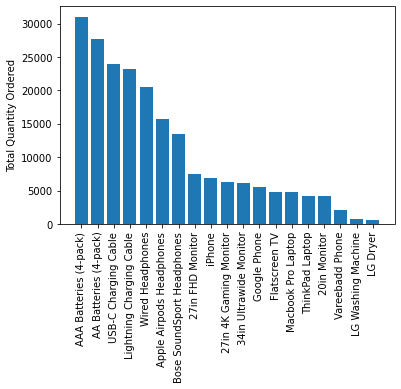

In [239]:
plt.bar(df5.Product,df5['Quantity Ordered'])
plt.xticks(rotation='vertical')
plt.ylabel('Total Quantity Ordered')
plt.show()

In [48]:
# product_group = df.groupby('Product')
# quantity_ordered = product_group.sum()['Quantity Ordered']

In [235]:
# product_group

In [236]:
# keys = [pair for pair, df in product_group]
# plt.bar(keys, quantity_ordered)
# plt.xticks(keys, rotation='vertical', size=8)
# plt.show()

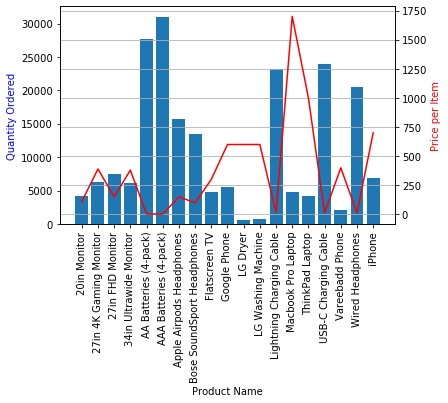

In [51]:
prices = df.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(keys,quantity_ordered)
ax2.plot(keys,prices,color='r')

plt.grid()
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='b')
ax2.set_ylabel('Price per Item',color='r')
ax1.set_xticklabels(keys,rotation='vertical')
fig.show()

<div style="text-align: right"> Many more Queries can be extracted to indicate the performance and deveop strategy for sales. </div>